Implementation of OPTICS clustering algorithm with Scikit learn

Code snippet to mount the google drive on colab

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Mention the location of your dataset on google drive



In [0]:
cd '/content/drive/My Drive/DataSets'

/content/drive/My Drive/DataSets


Importing required libraries for OPTICS clustering

In [0]:
import pandas as pd
import numpy as np

Code to read the dataset csv file and print the first few records

In [0]:
data = pd.read_csv("/content/drive/My Drive/DataSets/data.csv")
data.head()

,DATE,T10Y2Y,NASDAQCOM_PCH
0,6/2/76,0.71,0.39859
1,6/3/76,0.70,0.11343
2,6/4/76,0.77,-0.57784
3,6/7/76,0.79,-0.60399
4,6/8/76,0.79,-0.11465


Print entire dataset

In [0]:
data

,DATE,T10Y2Y,NASDAQCOM_PCH
0,6/2/76,0.71,0.39859
1,6/3/76,0.70,0.11343
2,6/4/76,0.77,-0.57784
3,6/7/76,0.79,-0.60399
4,6/8/76,0.79,-0.11465
5,6/9/76,0.82,-0.19513
6,6/10/76,0.86,0.41403
7,6/11/76,0.83,0.45814
8,6/14/76,0.83,0.78668
9,6/15/76,0.83,0.05656


Columns used for clustering

In [0]:
X_scaled = data[['T10Y2Y','NASDAQCOM_PCH']]
print(X_scaled)

       T10Y2Y  NASDAQCOM_PCH
0        0.71        0.39859
1        0.70        0.11343
2        0.77       -0.57784
3        0.79       -0.60399
4        0.79       -0.11465
5        0.82       -0.19513
6        0.86        0.41403
7        0.83        0.45814
8        0.83        0.78668
9        0.83        0.05656
10       0.81        0.54268
11       0.79        0.88834
12       0.82        0.36781
13       0.85        0.11105
14       0.80       -0.67665
15       0.80       -0.39089
16       0.82        0.68393
17       0.81        0.27840
18       0.84       -0.19989
19       0.84        0.26705
20       0.84        0.23305
21       0.86       -0.04429
22       0.85        0.66460
23       0.85       -0.02207
24       0.90        0.20971
25       1.01        0.76000
26       1.04        0.50284
27       1.03        0.03263
28       1.03        0.51104
29       1.05        0.08654
...       ...            ...
10409    0.17       -0.78647
10410    0.14       -1.31976
10411    0.16 

Building OPTICS Clustering model

In [0]:
from sklearn.cluster import OPTICS, cluster_optics_dbscan

# Building the OPTICS Clustering model 
optics = OPTICS(min_samples = 10, xi = 0.05, min_cluster_size = 0.05) 

# Training the model 
optics.fit(X_scaled) 

OPTICS(algorithm='auto', cluster_method='xi', eps=None, leaf_size=30,
       max_eps=inf, metric='minkowski', metric_params=None,
       min_cluster_size=0.05, min_samples=10, n_jobs=None, p=2,
       predecessor_correction=True, xi=0.05)

Store the results of the training as space, reachability and labels

In [0]:
from sklearn.cluster import OPTICS, cluster_optics_dbscan

labels_050 = cluster_optics_dbscan(reachability=optics.reachability_,
                                   core_distances=optics.core_distances_,
                                   ordering=optics.ordering_, eps=0.5)
labels_200 = cluster_optics_dbscan(reachability=optics.reachability_,
                                   core_distances=optics.core_distances_,
                                   ordering=optics.ordering_, eps=2)

space = np.arange(len(X_scaled))
reachability = optics.reachability_[optics.ordering_]
labels = optics.labels_[optics.ordering_]

print(labels)

[ 0  0  0 ... -1 -1 -1]


Plot the graph to visualize the results


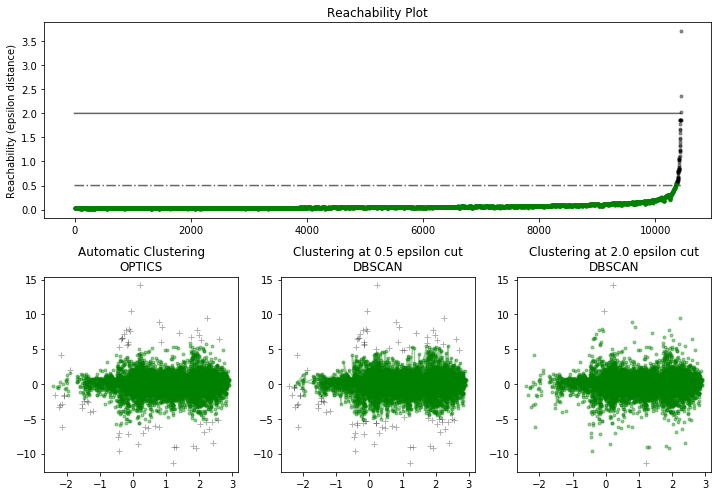

In [0]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Reachability plot
colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for k, color in zip(range(0, 5), colors):
    Xk = space[labels == k]
    Rk = reachability[labels == k]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.4)
ax1.plot(space, np.full_like(space, 2., dtype=float), 'k-', alpha=0.6)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.6)
ax1.set_ylabel('Reachability (epsilon distance)')
ax1.set_title('Reachability Plot')

# OPTICS
colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for k, color in zip(range(0, 5), colors):
    Xk = X_scaled[optics.labels_ == k]
    ax2.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], color, alpha=0.4, marker='.')
ax2.plot(X_scaled.iloc[optics.labels_ == -1, 0], X_scaled.iloc[optics.labels_ == -1, 1], 'k+', alpha=0.3)
ax2.set_title('Automatic Clustering\nOPTICS')

# DBSCAN at 0.5
colors = ['g', 'greenyellow', 'olive', 'r', 'b', 'c']
for k, color in zip(range(0, 6), colors):
    Xk = X_scaled[labels_050 == k]
    ax3.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], color, alpha=0.4, marker='.')
ax3.plot(X_scaled.iloc[labels_050 == -1, 0], X_scaled.iloc[labels_050 == -1, 1], 'k+', alpha=0.3)
ax3.set_title('Clustering at 0.5 epsilon cut\nDBSCAN')

# DBSCAN at 2.
colors = ['g.', 'm.', 'y.', 'c.']
for k, color in zip(range(0, 4), colors):
    Xk = X_scaled[labels_200 == k]
    ax4.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], color, alpha=0.4)
ax4.plot(X_scaled.iloc[labels_200 == -1, 0], X_scaled.iloc[labels_200 == -1, 1], 'k+', alpha=0.3)
ax4.set_title('Clustering at 2.0 epsilon cut\nDBSCAN')

plt.tight_layout()
plt.show()



Team: transformers-stock-market-prediction

Business Objective: 

The main objective of this project is to predict the bubble formation and next recession based on several factors such as yields on short-term and long-term maturity bonds, NASDAQ index, Gross Domestic Product growth rate, Unemployment rate and the inverted yield curve. These factors are the strong indicators in determining the probability of upcoming recession. 



DataSet: 


We are using dataset with NASDAQ and Yield curve with the difference of 10-year and 2 year treasury notes. The dataset can be find on the common google drive under “transformers-stock-market-prediction” folder

Link of dataset on drive:


https://docs.google.com/spreadsheets/d/1a0N1mEgPjB8J15TxJsWW_BGDpdhKFk-M7MK1lIDNsn0/edit?usp=sharing



Data Interpretation: 


Below is the data interpretation derived after applying unsupervised clustering algorithms on the data set:



1. Inverted Yield curve – The yield on long term investment (10 year) is lower than the yield on short term investment (2 year)
2. Real GDP - Growth rate less than 2% indicates Bubble formation and less than 0% or negative values indicate Recession period.
3. The GDP values goes down when the NASDAQ index is decreased
4. Unemployment level - As the value of NASDAQ composite index decreases, the rate of unemployment increases.

